# Setup

In [301]:
import arviz as az
import numpy as np
import pandas as pd
import pymc3 as pm
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

from typing import List

# Problem

Describe problem here. 

See e.g.:

* [Wiki](https://en.wikipedia.org/wiki/German_tank_problem)
* [Example 1](https://www.isaacslavitt.com/2015/12/19/german-tank-problem-with-pymc-and-pystan/)
* [Example 2](http://mcleonard.github.io/sampyl/examples/german_tank_problem.html)

## Generating data

In [2]:
# Defining data
def generate_data(true_N: int, size: int, save: bool=True):
    """Generate CSV file containing tank serial numbers"""
    observations = np.random.randint(low=1, high=true_N, size=size)
    data = pd.DataFrame({"serial_no": observations})
    if save:
        data.to_csv("german_tanks.csv", index=False)
    return data

# Generate data
captured_tanks = 7
german_records = 369
data = generate_data(true_N=german_records, size=captured_tanks)

data

,serial_no
0,320
1,82
2,208
3,204
4,109
5,343
6,311


## Sampling from the posterior

In [9]:
with pm.Model() as model:
    # Defining prior distribution
    N = pm.DiscreteUniform("num_tanks", lower=data["serial_no"].max(), upper=10000)
    # Defining likelihood
    likelihood = pm.DiscreteUniform("observed_sn", lower=1, upper=N, observed=data["serial_no"])
    
    # Defining MCMC algorithm (NOTE: Discrete data --> Metropolis)
    step = pm.Metropolis()
    # Defining initial values
    start = {"num_tanks": data["serial_no"].max()}
    
    # Sampling
    trace = pm.sample(draws=100000, step=step, start=start)
    # Discarding the burn-in period
    burned_trace = trace[10000:]

Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [num_tanks]
Sampling 4 chains, 0 divergences: 100%|██████████| 402000/402000 [00:31<00:00, 12616.46draws/s]
The number of effective samples is smaller than 10% for some parameters.


## Checking convergence

/Users/sean/miniconda3/envs/fagdag/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"


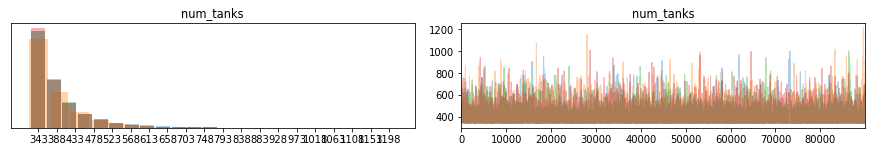

In [10]:
# Plotting trace
az.plot_trace(burned_trace)
plt.show()

According to our model, the expected number of tanks is approximately 369.

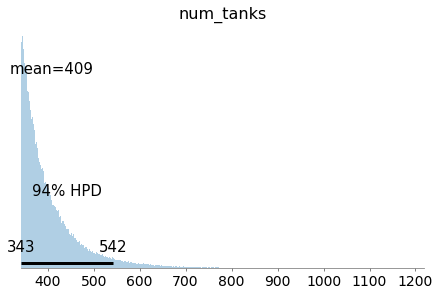

In [11]:
# Plotting posterior distribution
az.plot_posterior(burned_trace)
plt.show()

In [12]:
# Printing summary of posterior distribution
az.summary(burned_trace)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
num_tanks,408.625,74.885,343.0,542.0,1.112,0.835,4533.0,4022.0,8288.0,5342.0,1.0
